In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("../self/df_pre_3.csv")
df = df_raw.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54480 entries, 0 to 54479
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_bytes_sent         54480 non-null  int64  
 1   request_method          54480 non-null  object 
 2   request_length          54480 non-null  int64  
 3   bytes_sent              54480 non-null  int64  
 4   request_time            54480 non-null  float64
 5   upstream_response_time  54480 non-null  float64
 6   connection_requests     54480 non-null  int64  
 7   agent.ip                54480 non-null  object 
 8   rule.mitre.tactic       54480 non-null  object 
 9   is_post_login           54480 non-null  int64  
 10  user_count              54480 non-null  int64  
 11  status_group            54480 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 5.0+ MB


In [4]:
df_attacks = df[df['rule.mitre.tactic'] != '["non-attack"]']
df_attacks

,body_bytes_sent,request_method,request_length,bytes_sent,request_time,upstream_response_time,connection_requests,agent.ip,rule.mitre.tactic,is_post_login,user_count,status_group
38,98,POST,329,281,0.033,0.030,181,192.168.1.99,"[""Impact""]",0,11,2
54,1169,POST,184,1378,0.068,0.068,158,192.168.1.99,"[""Impact""]",0,86,2
98,27,POST,156,210,0.091,0.088,209,192.168.1.99,"[""Impact""]",0,6,2
99,27,POST,161,210,0.099,0.098,90,192.168.1.99,"[""Impact""]",0,38,2
187,6712,POST,182,6921,0.103,0.104,219,192.168.1.99,"[""Impact""]",0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
54369,7754,POST,325,7963,1.738,1.738,159,192.168.1.99,"[""Impact""]",0,2,2
54400,29,POST,254,259,0.093,0.092,42,192.168.1.99,"[""Impact""]",0,2,2
54422,27,POST,268,210,0.106,0.105,41,192.168.1.99,"[""Impact""]",0,1,2
54458,67,POST,269,250,1.011,1.012,180,192.168.1.99,"[""Impact""]",0,1,2


In [6]:
df_attacks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 38 to 54466
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_bytes_sent         2379 non-null   int64  
 1   request_method          2379 non-null   object 
 2   request_length          2379 non-null   int64  
 3   bytes_sent              2379 non-null   int64  
 4   request_time            2379 non-null   float64
 5   upstream_response_time  2379 non-null   float64
 6   connection_requests     2379 non-null   int64  
 7   agent.ip                2379 non-null   object 
 8   rule.mitre.tactic       2379 non-null   object 
 9   is_post_login           2379 non-null   int64  
 10  user_count              2379 non-null   int64  
 11  status_group            2379 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 241.6+ KB


In [7]:
df_attacks.describe()

,body_bytes_sent,request_length,bytes_sent,request_time,upstream_response_time,connection_requests,is_post_login,user_count,status_group
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,1721.158890,689.647751,1946.585540,0.240235,0.230547,145.511559,0.002102,219.655738,2.500631
std,4398.047207,10933.132237,4439.494219,0.556006,0.544282,186.113658,0.045806,462.121806,0.863411
min,0.000000,36.000000,167.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
25%,29.000000,186.000000,228.000000,0.032000,0.030000,9.000000,0.000000,3.000000,2.000000
50%,229.000000,269.000000,417.000000,0.080000,0.078000,98.000000,0.000000,9.000000,2.000000
75%,808.000000,467.000000,1053.500000,0.162000,0.146000,199.000000,0.000000,110.000000,3.000000
max,65158.000000,458002.000000,65651.000000,11.807000,11.808000,998.000000,1.000000,1676.000000,4.000000


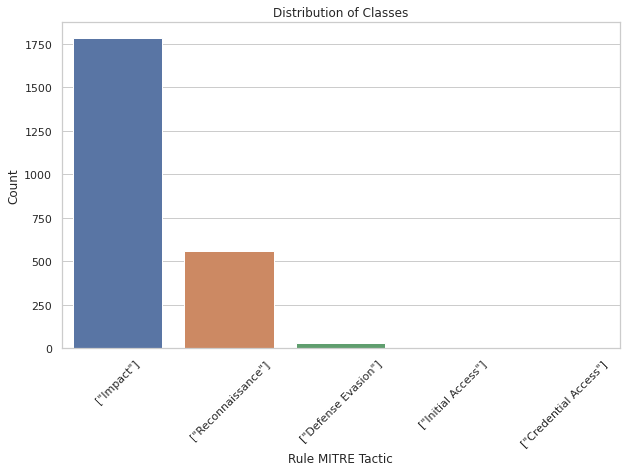

In [9]:
sns.set(style='whitegrid')

# Create a count plot to visualize the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_attacks, x='rule.mitre.tactic', order=df_attacks['rule.mitre.tactic'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Rule MITRE Tactic')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


In [11]:
cross_tab = pd.crosstab(df['rule.mitre.tactic'], df['request_method'])

# Display the cross-tabulation
print(cross_tab)

# Pivot table to summarize statistics for different classes
pivot_table = df.pivot_table(index='rule.mitre.tactic', 
                               values=['body_bytes_sent', 'request_length', 'bytes_sent'], 
                               aggfunc={'body_bytes_sent': 'mean', 
                                        'request_length': 'mean',
                                        'bytes_sent': 'mean'})

# Display the pivot table
print(pivot_table)


request_method           GET  HEAD  POST
rule.mitre.tactic                       
["Credential Access"]      0     0     1
["Defense Evasion"]       29     0     0
["Impact"]                 0     0  1784
["Initial Access"]         4     0     0
["Reconnaissance"]       554     0     7
["non-attack"]         51695    16   390
                       body_bytes_sent   bytes_sent  request_length
rule.mitre.tactic                                                  
["Credential Access"]       956.000000  1224.000000      684.000000
["Defense Evasion"]        6137.068966  6521.862069      412.344828
["Impact"]                 1377.278587  1584.358744      805.746076
["Initial Access"]         3818.250000  4577.250000      757.750000
["Reconnaissance"]         2572.848485  2844.499109      334.310160
["non-attack"]              711.521468   937.167981     2902.477688


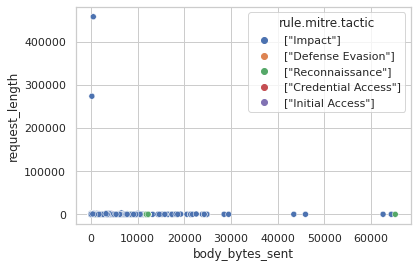

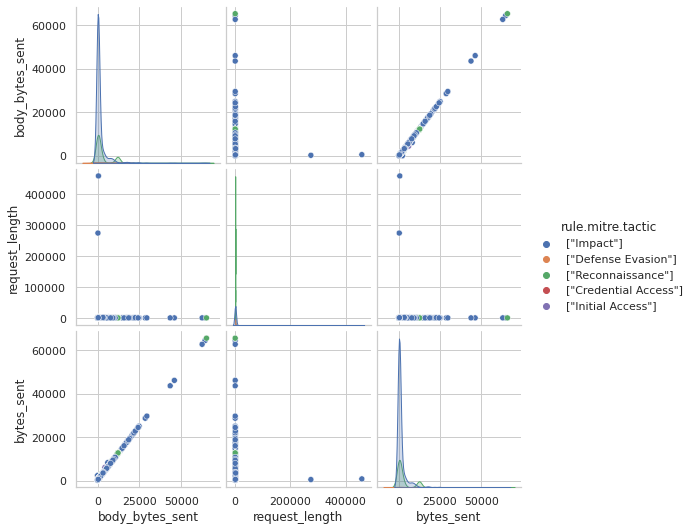

In [13]:
# Multivariate scatter plot
sns.scatterplot(data=df_attacks, x='body_bytes_sent', y='request_length', hue='rule.mitre.tactic')

# Pair plot for numeric features
sns.pairplot(data=df_attacks, hue='rule.mitre.tactic', vars=['body_bytes_sent', 'request_length', 'bytes_sent'])


<AxesSubplot: xlabel='body_bytes_sent', ylabel='Count'>

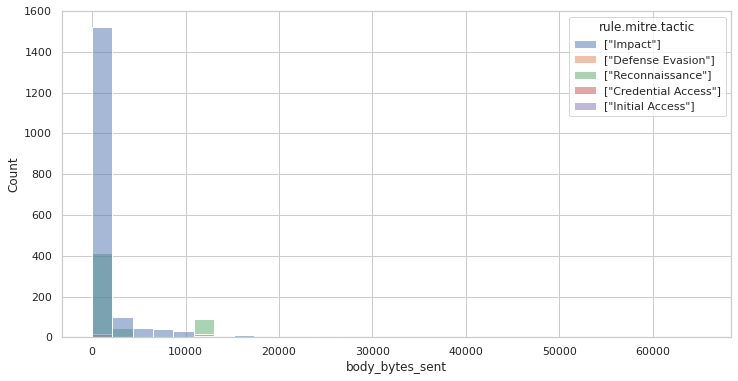

In [14]:
# Histograms by class
plt.figure(figsize=(12, 6))
sns.histplot(data=df_attacks, x='body_bytes_sent', hue='rule.mitre.tactic', common_norm=False, bins=30)

agent.ip               192.168.1.99
rule.mitre.tactic                  
["Credential Access"]             1
["Defense Evasion"]              29
["Impact"]                     1784
["Initial Access"]                4
["Reconnaissance"]              561


<AxesSubplot: xlabel='agent.ip', ylabel='rule.mitre.tactic'>

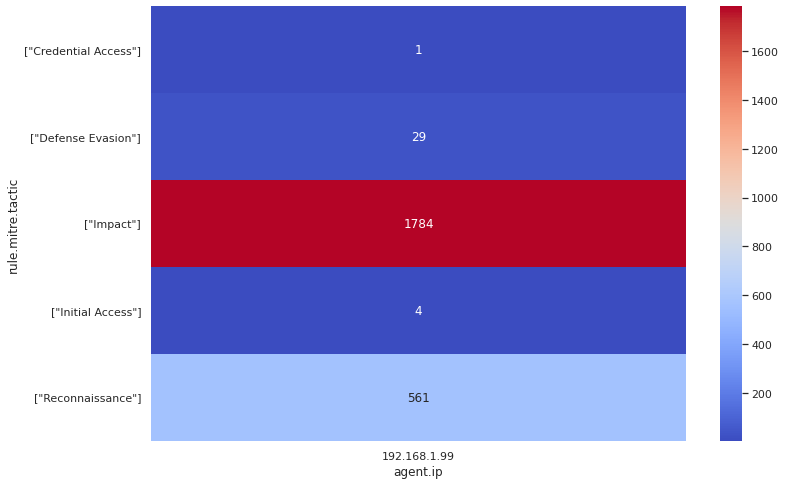

In [15]:
# Contingency table
contingency_table = pd.crosstab(df_attacks['rule.mitre.tactic'], df_attacks['agent.ip'])
print(contingency_table)

# Visualize relationships with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d')

/tmp/ipykernel_18339/2882083487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


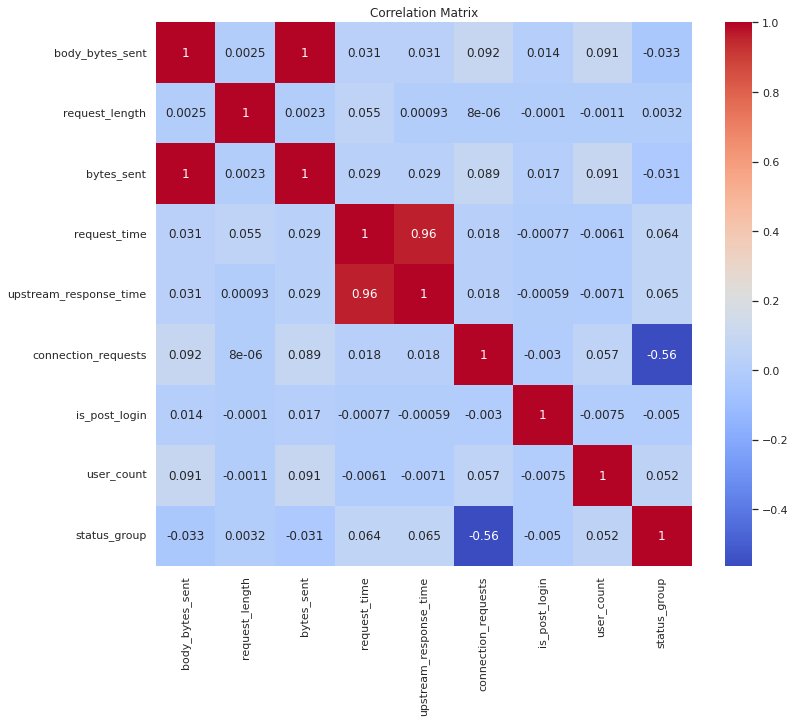

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()